In [22]:
import pandas as pd
import re
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MultiLabelBinarizer


# 假设数据
data = pd.DataFrame({
    'game_id': [1, 2, 3, 4],
    'game_tags': [['RPG', 'Fantasy'], ['FPS', 'Multiplayer'], ['RPG', 'Co-op'], ['Simulation', 'Singleplayer']]
})

# 将列表型的标签转换为独热编码
tag_lists = data['game_tags']
all_tags = [tag for sublist in tag_lists for tag in sublist]  # 展开所有标签
unique_tags = list(set(all_tags))  # 去重，获取唯一标签
data

,game_id,game_tags
0,1,"[RPG, Fantasy]"
1,2,"[FPS, Multiplayer]"
2,3,"[RPG, Co-op]"
3,4,"[Simulation, Singleplayer]"


In [23]:
mlb = MultiLabelBinarizer()
one_hot_encoded_genres = pd.DataFrame(mlb.fit_transform(data['game_tags']), columns=mlb.classes_, index=data.index)

In [24]:
# 将新的独热编码数据添加回原始data
data = pd.concat([data, one_hot_encoded_genres], axis=1)

In [19]:
data

,game_id,game_tags,Co-op,FPS,Fantasy,Multiplayer,RPG,Simulation,Singleplayer
0,1,"[RPG, Fantasy]",0,0,1,0,1,0,0
1,2,"[FPS, Multiplayer]",0,1,0,1,0,0,0
2,3,"[RPG, Co-op]",1,0,0,0,1,0,0
3,4,"[Simulation, Singleplayer]",0,0,0,0,0,1,1


In [ ]:
# 标准化数据
scaler = StandardScaler()
scaled_features = scaler.fit_transform(encoded_df)



In [ ]:
# 应用 K-means 聚类
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# 结果输出
data['cluster'] = clusters
print(data[['game_id', 'game_tags', 'cluster']])

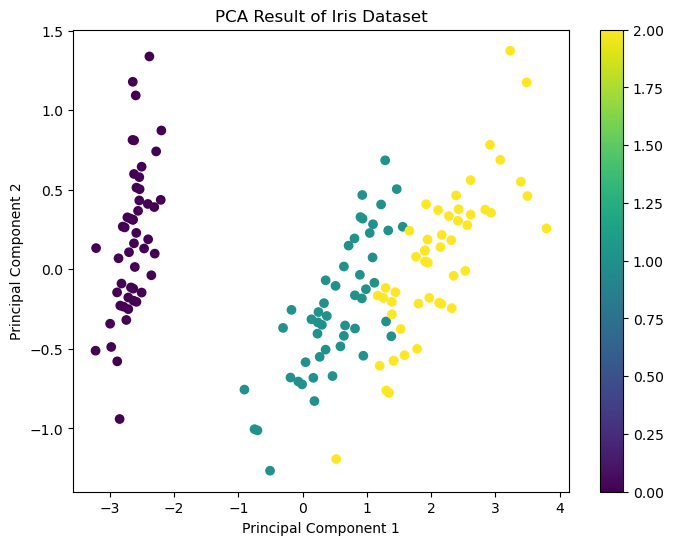

In [25]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# 加载示例数据集
data = load_iris()
X = data.data

# 初始化 PCA，设置 n_components 为 2
pca = PCA(n_components=2)

# 对数据进行 PCA 转换
X_transformed = pca.fit_transform(X)

# 可视化结果
plt.figure(figsize=(8, 6))
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=data.target)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Result of Iris Dataset')
plt.colorbar()
plt.show()


In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
def calculate_distances(dimensions, num_points=1000):
    # 生成高维随机点，这里的num_points指的是多少行，dimension指的是多少列，类比df或者array
    points = np.random.normal(0, 1, (num_points, dimensions))
    
    # 计算第一个点与其他所有点之间的距离
    distances = np.sqrt(np.sum((points - points[0])**2, axis=1))
    
    # 返回距离的均值和标准差
    return np.mean(distances), np.std(distances)

# 不同维度
dimensions = range(1, 100, 1)  # 从1维到100维，步长为10
means = []
std_devs = []

# 计算每个维度的距离均值和标准差
for dim in dimensions:
    mean, std_dev = calculate_distances(dim)
    means.append(mean)
    std_devs.append(std_dev)

c:\Users\55386\anaconda3\envs\Zeyu_for_data_analyze_use\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\55386\anaconda3\envs\Zeyu_for_data_analyze_use\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\55386\anaconda3\envs\Zeyu_for_data_analyze_use\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\55386\anaconda3\envs\Zeyu_for_data_analyze_use\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWar

Text(0.5, 1.0, 'Effect of Increasing Dimensions on Point Distances with Seaborn')

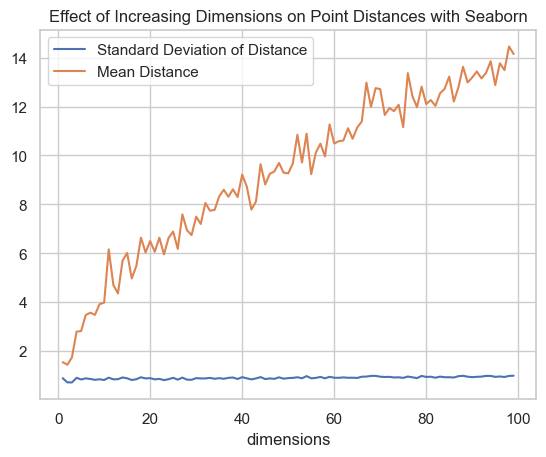

In [40]:
sns.lineplot(x = dimensions, y = std_devs,label='Standard Deviation of Distance', )
sns.lineplot(x=dimensions, y=means, label='Mean Distance', )
plt.xlabel(xlabel='dimensions')
plt.title('Effect of Increasing Dimensions on Point Distances with Seaborn')